<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Time-Series-in-Python" data-toc-modified-id="Introduction-to-Time-Series-in-Python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Time Series in Python</a></span></li><li><span><a href="#Notation-in-Time-Series-Data" data-toc-modified-id="Notation-in-Time-Series-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notation in Time Series Data</a></span></li><li><span><a href="#Pecularities-of-Time-Series-Data" data-toc-modified-id="Pecularities-of-Time-Series-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pecularities of Time Series Data</a></span></li><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Loading the data</a></span><ul class="toc-item"><li><span><a href="#Importing-the-packages" data-toc-modified-id="Importing-the-packages-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Importing the packages</a></span></li><li><span><a href="#Importing-the-Data" data-toc-modified-id="Importing-the-Data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Importing the Data</a></span></li><li><span><a href="#Examining-the-Data" data-toc-modified-id="Examining-the-Data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Examining the Data</a></span></li><li><span><a href="#Plotting-the-Data" data-toc-modified-id="Plotting-the-Data-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Plotting the Data</a></span></li><li><span><a href="#The-QQ-Plot" data-toc-modified-id="The-QQ-Plot-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>The QQ Plot</a></span></li></ul></li></ul></div>

# Introduction to Time Series in Python

1. What is Time-Series-Data
    - A Sequence of information which attaches a time period to each value
    - The values can be like prices, temperature which can be calculated wrt time

2. What is a time period
    - It is the time interval between recording one value and the next

3. What is frequency of the data set
    - How often the data is collected is called frequency
    - If all time periods are equal, frequency will be constant

4. Examples of time series analysis
    - Weather forcast
    - Finance and investing: Determining the stability of financial markets and the efficiency portfolios

5. Time series data is effected by the following
    - Seasonality
    - Trend

# Notation in Time Series Data

1. X = Value across the entire time period
2. T = Entire period
3. t = a single period
4. X(t) = Value for a single period
5. X(t-1) = Value for the previous period

# Pecularities of Time Series Data

1. We need to have consistent data throughout time, i.e., we should not have missing values
    - If we have missing values, we need to handle it. Few examples for fixing are
        - Approximating the data
        - Impute the data
2. We cannot shuffle data and take train and test data for developing the model. 
    - We need to select a break-off point in time where the data before that time is train data and the data after that is test data
      

# Loading the data

## Importing the packages

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
import pylab

## Importing the Data

In [6]:
# Reading the raw data from the CSV
raw_csv_data = pd.read_csv("datasets/Section_3_Introduction_to_time_series_in_python/Index2018.csv")

In [7]:
# making a copy to work on it, keeping original dataframe untouched
df_comp = raw_csv_data.copy()

## Examining the Data

In [8]:
# Table preview
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


- We usually use date as index for time series data
- The remaining four columns are closing prices for the Market indexes
    - spx = S&P 500 (USA) 
    - dax = DAX 30 (Germany)
    - ftse = FTSE 100 (UK)
    - nikkei = NIKKEI 225 (Japan)
- The number mentioned next to the name is the number of companies measured in that column   
 

In [9]:
# Summarise the data
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [11]:
# Check if there are any nulls
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Plotting the Data

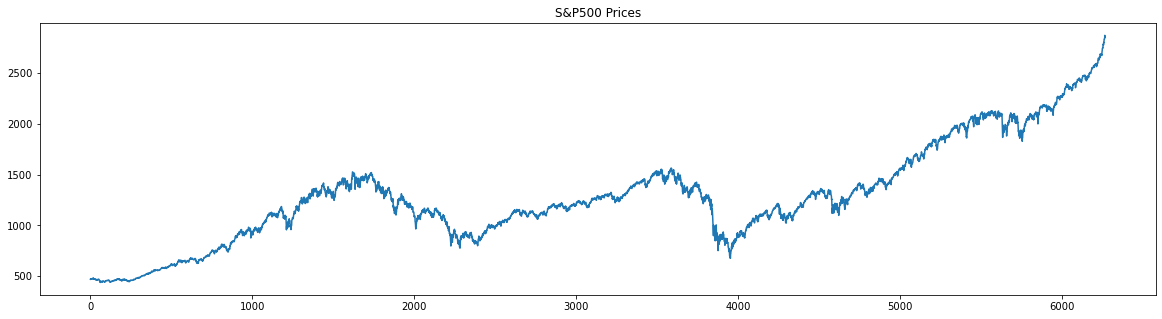

In [16]:
df_comp.spx.plot(figsize=(20,5), title="S&P500 Prices")
plt.show()

- The above graph does not have the date as index, so we are seeing integer values in x axis

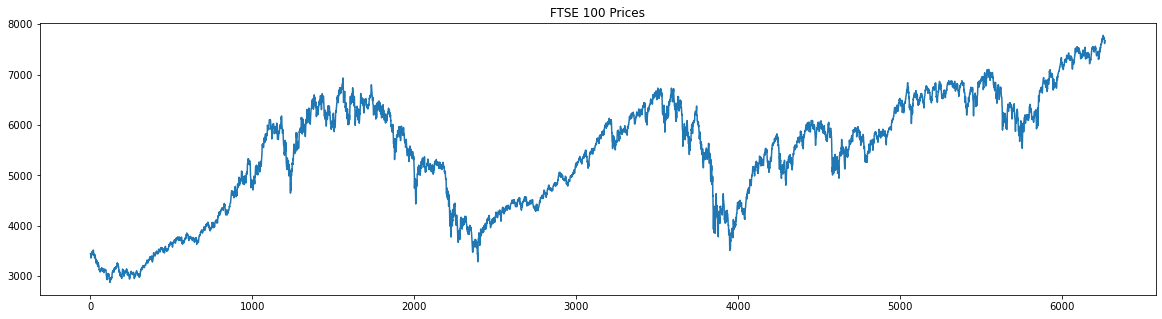

In [18]:
df_comp.ftse.plot(figsize=(20,5), title="FTSE 100 Prices")
plt.show()

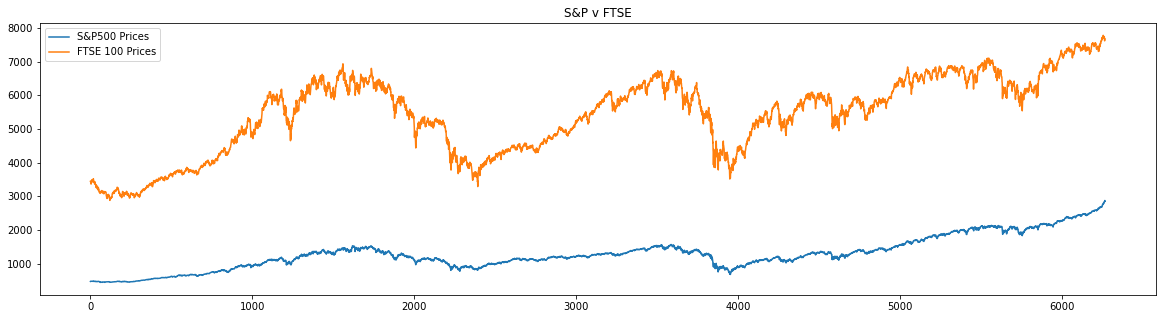

In [22]:
df_comp.spx.plot(figsize=(20,5), label="S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), label="FTSE 100 Prices")
plt.title("S&P v FTSE")
plt.legend()
plt.show()

## The QQ Plot

- Quantile-Quantile Plot (QQ Plot)
    - Used to determine whether a dataset is distributed a certain way
    - Usually showcases how the data fits a Normal Distribution

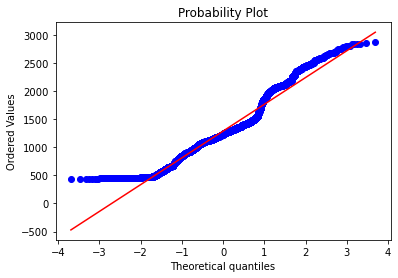

In [26]:
scipy.stats.probplot(df_comp.spx, plot=pylab)
pylab.show()

- QQ Plot takes all the values a variable can take and arrange them in ascending order
- **Ordered Values** = Variable value (Here it is price)
- **Theoretical quantiles** = How many standard deviations away from the mean these values are
- **Red line** = What data points should follow, if they are Normally Distributed

- As we observe many data points are near 500, so the data is not Normally Distributed
- So we cannot use methods related to Normal Distribution